# Residuals-Analysis

This part of the time series analysis of various indices deals with the evaluation of the residuals of the time series itself.

Residuals are next to trend & seasonality a component that characterize a data set as a time series.

The goal is to quantify the measurement of the difference between expected and actual values, i.e. residuals error.

Residuals == The random variation in the series

##### Data Preprocessing

- Data import
- Data cleaning (remove "NaN")
- Close-price formatting (to float64-type)
- Date formatting ( M8[ns]-type)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas.util.testing as tm

from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


**Import DAX-Kursindex**

In [ ]:
daxkurs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub/00_Repo_Phd-Analysen/(2)_DAX_Kursindex_Zeitreihen-Analyse/01_Datensätze/DAX_KursIndex.csv", 
                      parse_dates = ["Datum"], sep = ";", decimal = ",", index_col = ["Datum"], infer_datetime_format = True)

daxkurs.head()

,Schluss
Datum,
03.01.2000,"5.248,12"
04.01.2000,"5.120,77"
05.01.2000,"5.054,78"
06.01.2000,"5.033,67"
07.01.2000,"5.271,59"


In [ ]:
# Drop NaN's in Dataframe
daxkurs = daxkurs.dropna()

In [ ]:
# Check if NaN-values were dropped
daxkurs.isna().sum()

Schluss    0
dtype: int64

In [ ]:
# View column types and address correct transformation
daxkurs.dtypes

Schluss    object
dtype: object

In [ ]:
# Transform "Schluss"-column from "object"-type into "float64"-type
daxkurs["Schluss"] = daxkurs["Schluss"].str.replace("[\,\.]", "").astype(int)
daxkurs.head()

,Schluss
Datum,
03.01.2000,524812
04.01.2000,512077
05.01.2000,505478
06.01.2000,503367
07.01.2000,527159


In [ ]:
# Divide by 100 to remain correct unit / scale
daxkurs["Schluss"] = [x/100 for x in daxkurs["Schluss"]]

In [ ]:
daxkurs.head()

,Schluss
Datum,
03.01.2000,5248.12
04.01.2000,5120.77
05.01.2000,5054.78
06.01.2000,5033.67
07.01.2000,5271.59


In [ ]:
# Check index type -> "O" stands for object-type
daxkurs.index.dtype

dtype('O')

In [ ]:
daxkurs.index = pd.to_datetime(daxkurs.index, errors = "coerce", dayfirst = True)
daxkurs.head()

,Schluss
Datum,
2000-01-03,5248.12
2000-01-04,5120.77
2000-01-05,5054.78
2000-01-06,5033.67
2000-01-07,5271.59


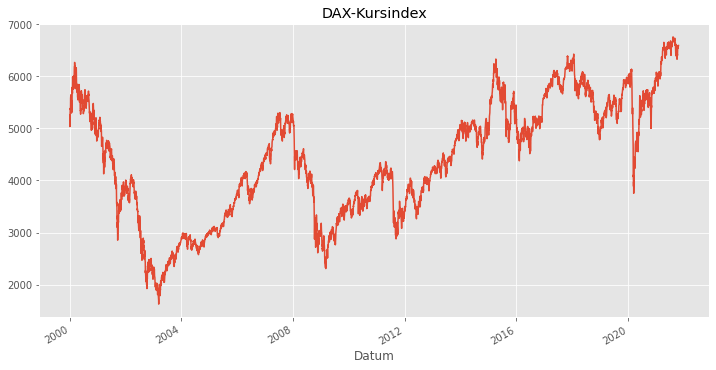

In [ ]:
plt.figure(figsize = (12,6))
plt.style.use("ggplot")
daxkurs["Schluss"].plot(title = "DAX-Kursindex");

##### Extracting the Residual-component

The additive model is Y[t] = T[t] + S[t] + e[t]

The multiplicative model is Y[t] = T[t] * S[t] * e[t]

Mehr zu Additivity & Multplicativity
- [Combining TS Components](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)

```
# Access Components
s = statsmodels.tsa.seasonal.seasonal_decompose(df)

s.resid # residual-component
s.seasonal # seasonal-component
s.trend # trend-component
```



<Figure size 1440x864 with 0 Axes>

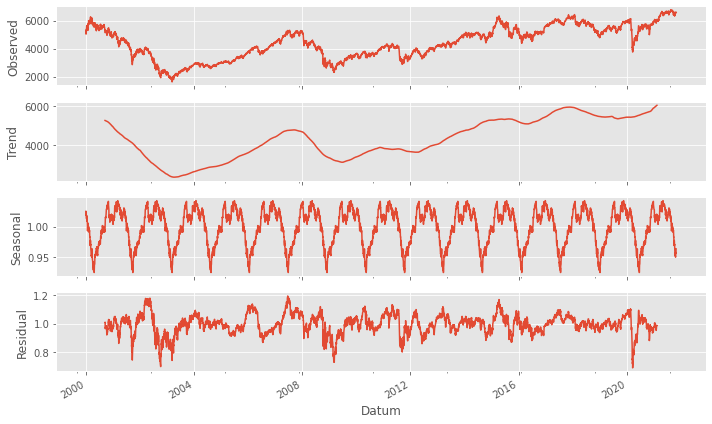

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult
import matplotlib.pyplot as plt


dax_decomp = seasonal_decompose(daxkurs, model = "multiplicative", freq = 365)

plt.rcParams.update({'figure.figsize': (10,6)})
plt.figure(figsize = (20,12))
plt.style.use("ggplot")
dax_decomp.plot();

In [ ]:
# Extract residuals-component
dax_decomp.resid.isna().sum()

Schluss    364
dtype: int64

In [ ]:
# Remove NaN-values
dax_resid = dax_decomp.resid.dropna()
dax_resid = pd.DataFrame(dax_resid)
dax_resid.head()

,Schluss
Datum,
2000-09-18,1.008062
2000-09-19,1.009341
2000-09-20,0.984203
2000-09-21,0.964427
2000-09-22,0.970986


In [ ]:
dax_resid.shape

(5173, 1)

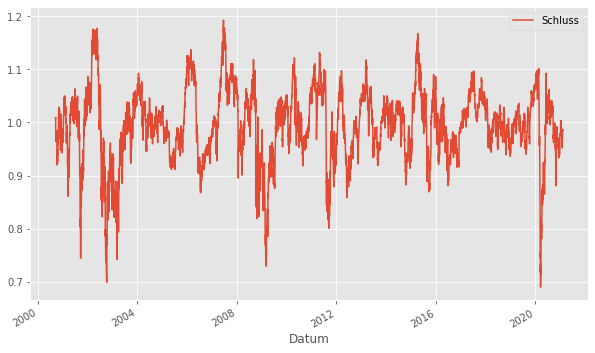

In [ ]:
dax_resid.plot()

### Residuals: S&P500

##### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sp500 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub/00_Repo_Phd-Analysen/(2)_DAX_Kursindex_Zeitreihen-Analyse/01_Datensätze/S&P500_Index.csv",
                    sep = ";", decimal = ",", parse_dates = ["Datum"], index_col = ["Datum"], infer_datetime_format = True)
sp500 = sp500[["Schluss"]]
sp500.head()

,Schluss
Datum,
03.01.2000,"1.455,22"
04.01.2000,"1.399,42"
05.01.2000,"1.402,11"
06.01.2000,"1.403,45"
07.01.2000,"1.441,47"


In [ ]:
# Check für NaN-Values
sp500 = sp500.dropna()
sp500.isna().sum()

Schluss    0
dtype: int64

In [ ]:
sp500["Schluss"] = [x.replace(".", "") for x in sp500["Schluss"]]
sp500.head()

,Schluss
Datum,
03.01.2000,"1455,22"
04.01.2000,"1399,42"
05.01.2000,"1402,11"
06.01.2000,"1403,45"
07.01.2000,"1441,47"


In [ ]:
# Überprüfen der Spalten-Eigenschaften
len(sp500.index), len(sp500["Schluss"]), sp500.isna().sum()

(5477, 5477, Schluss    0
 dtype: int64)

In [ ]:
# Transformieren der Schluss-Spalte
sp500["Schluss"] = [float(x.replace(",", ".")) for x in sp500["Schluss"]]
sp500.head()

,Schluss
Datum,
03.01.2000,1455.22
04.01.2000,1399.42
05.01.2000,1402.11
06.01.2000,1403.45
07.01.2000,1441.47


In [ ]:
# Check für falsche Transformationen der Werte in der "Schluss"-Spalte
sp500[sp500["Schluss"] < 100]

,Schluss
Datum,


In [ ]:
# Check für Spalten-Typen
sp500.index.dtype

dtype('O')

In [ ]:
# Transform index type into datetime
sp500.index = pd.to_datetime(sp500.index, errors = "coerce", dayfirst = True)
sp500.head()

,Schluss
Datum,
2000-01-03,1455.22
2000-01-04,1399.42
2000-01-05,1402.11
2000-01-06,1403.45
2000-01-07,1441.47


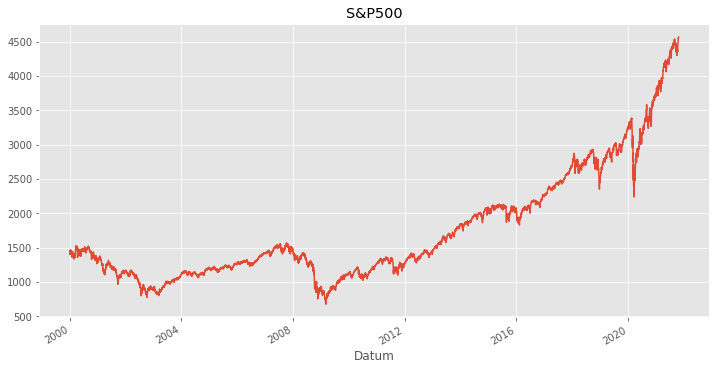

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
#plt.style.use ("ggplot")

sp500["Schluss"].plot(title = "S&P500");

##### Extracting the Residual-component

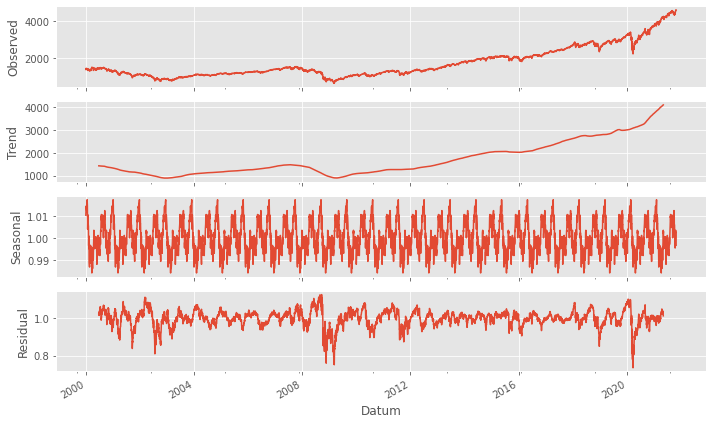

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

sp500_decomp = seasonal_decompose(sp500, model = "multiplicative", freq = 240)
sp500_decomp.plot();

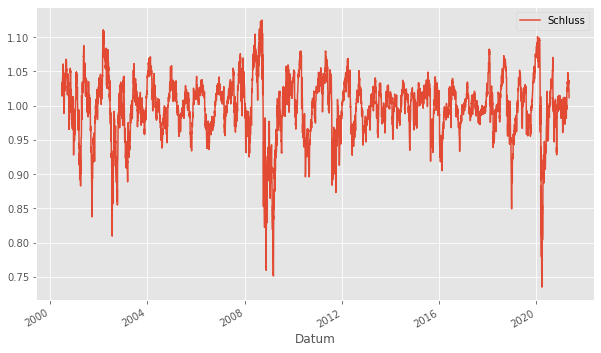

In [ ]:
# Extract Residuals 
sp500_resid = sp500_decomp.resid.dropna()

sp500_resid.plot();

### Residuals: STOXX Europe600

##### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
stoxx600 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub/00_Repo_Phd-Analysen/(2)_DAX_Kursindex_Zeitreihen-Analyse/01_Datensätze/STOXX_Europe600.csv",
                       sep = ";", decimal = ",", parse_dates = ["Datum"], index_col = ["Datum"], infer_datetime_format = True)

stoxx600.head()

,Eroeffnung,Hoch,Tief,Schluss,Volumen
Datum,,,,,
03.01.2000,378.94,384.42,377.45,377.69,0
04.01.2000,377.18,377.18,361.46,362.70,0
05.01.2000,362.04,362.04,351.74,353.74,0
06.01.2000,353.91,355.27,349.67,352.21,0
07.01.2000,352.25,360.23,352.25,359.75,0


In [ ]:
# Subset nur für "Schluss"-Spalte
stoxx600 = stoxx600[["Schluss"]]
stoxx600.head()

,Schluss
Datum,
03.01.2000,377.69
04.01.2000,362.70
05.01.2000,353.74
06.01.2000,352.21
07.01.2000,359.75


In [ ]:
# Check für NaN-Werte
stoxx600.isna().sum()

Schluss    1
dtype: int64

In [ ]:
# Drop NaN-Werte und update stoxx600-Dataframe
stoxx600 = stoxx600.dropna()

In [ ]:
# Check für type der "Schluss"-Spalte
stoxx600.dtypes # keine Transformation erforderlich

Schluss    float64
dtype: object

In [ ]:
stoxx600.index = pd.to_datetime(stoxx600.index, errors = "coerce", dayfirst = True)
stoxx600.head()

,Schluss
Datum,
2000-01-03,377.69
2000-01-04,362.70
2000-01-05,353.74
2000-01-06,352.21
2000-01-07,359.75


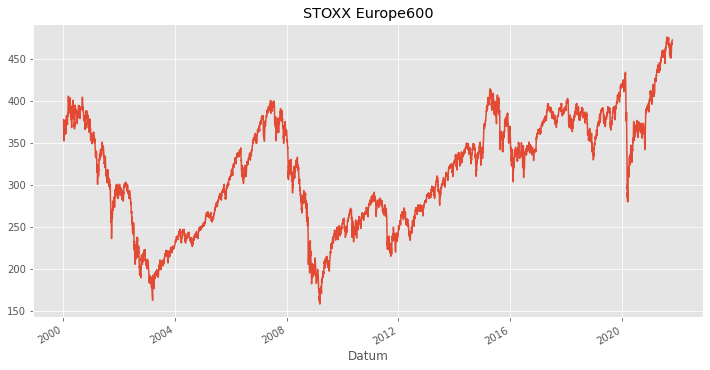

In [ ]:
# Plot der Schlusskurse des STOXX Europe 600
plt.figure(figsize = (12, 6))
plt.style.use("ggplot")
stoxx600["Schluss"].plot(title = "STOXX Europe600");

##### Extracting the Residual-component

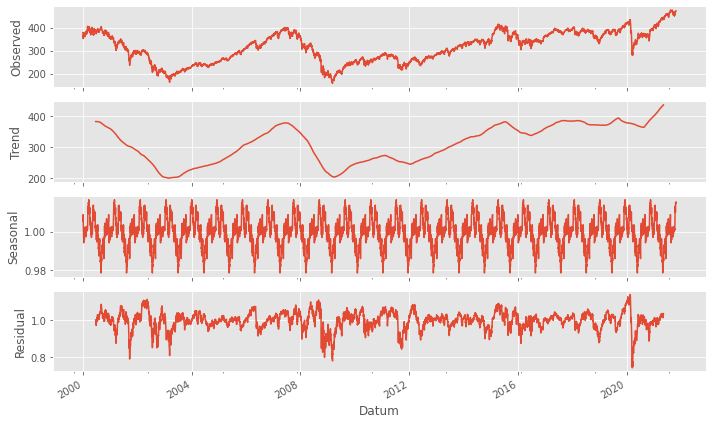

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Awenden der Decompose-Funktion von statsmodels
# freq = 240, i.e. 240 Handelstage (20 x 12)
stoxx600_decomp = seasonal_decompose(stoxx600, model = "multiplicative", freq = 240)
stoxx600_decomp.plot();

In [ ]:
# Extraktion der Residuals
stoxx600_resid = stoxx600_decomp.resid.dropna()
stoxx600_resid.head()

,Schluss
Datum,
2000-06-22,1.001229
2000-06-23,0.998208
2000-06-26,1.000538
2000-06-27,0.994568
2000-06-28,0.995825


### Residuals: SMI

##### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
smi = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub/00_Repo_Phd-Analysen/(2)_DAX_Kursindex_Zeitreihen-Analyse/01_Datensätze/SMI_Index.csv", 
                  sep = ";", decimal = ",", parse_dates = ["Datum"], index_col = ["Datum"], infer_datetime_format = True)

smi.head()

,Eroeffnung,Hoch,Tief,Schluss,Volumen
Datum,,,,,
04.01.2000,"7.484,80","7.485,40","7.266,70","7.268,10",0
05.01.2000,"7.153,10","7.265,50","7.114,10","7.181,30",0
06.01.2000,"7.177,20","7.301,90","7.174,70","7.280,60",0
07.01.2000,"7.338,70","7.448,00","7.338,10","7.448,00",0
10.01.2000,"7.518,70","7.544,00","7.447,30","7.452,80",0


In [ ]:
# Subset SMI-Dataframe nur für "Schluss"-Spalte
smi = smi[["Schluss"]]
smi.head()

,Schluss
Datum,
04.01.2000,"7.268,10"
05.01.2000,"7.181,30"
06.01.2000,"7.280,60"
07.01.2000,"7.448,00"
10.01.2000,"7.452,80"


In [ ]:
# Check für NaN-Werte
smi.isna().sum()

Schluss    1
dtype: int64

In [ ]:
# Löschen der NaN-Werte
smi = smi.dropna()

In [ ]:
# Check type der "Schluss"-Spalte
smi.dtypes

Schluss    object
dtype: object

In [ ]:
# "Schluss"-Spalte ist "object"-type, Transformation needed

# Enfternen von dem Dot als Tsd-Trennzeichen
smi["Schluss"] = [x.replace(".", "") for x in smi["Schluss"]]
print(smi["Schluss"].head(3))

# Es werden nur die Reihen transformiert, die eine Dezimalstelle haben (gekennzeichnet durch ",") 
# Zusätzlich wird jeder Werte in einen "float"-type ungewandelt
smi["Schluss"] = [float(x.replace(",", ".")) for x in smi["Schluss"]]
print(smi["Schluss"].head(3))

Datum
  04.01.2000    7268,10
  05.01.2000    7181,30
  06.01.2000    7280,60
Name: Schluss, dtype: object
Datum
  04.01.2000    7268.1
  05.01.2000    7181.3
  06.01.2000    7280.6
Name: Schluss, dtype: float64


In [ ]:
# Check für falsche Kurse (ohne Decimal )
smi[smi["Schluss"] < 100].sum()

Schluss    0.0
dtype: float64

In [ ]:
# Transformieren der Index Spalte
smi.index = pd.to_datetime(smi.index, errors = "coerce", dayfirst = True)
smi.head()

,Schluss
Datum,
2000-01-04,7268.1
2000-01-05,7181.3
2000-01-06,7280.6
2000-01-07,7448.0
2000-01-10,7452.8


##### Extracting the Residual-component

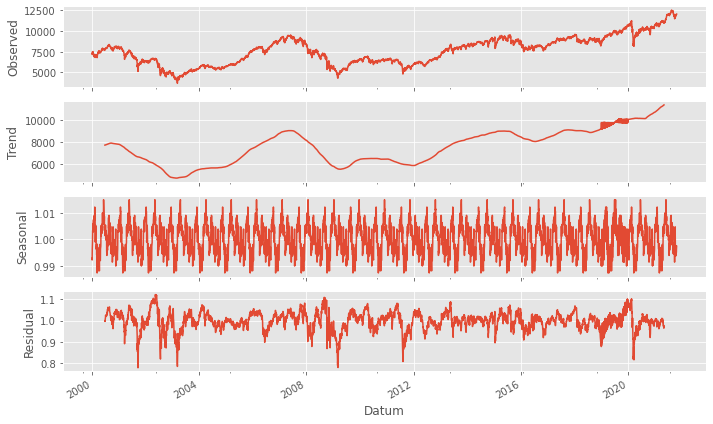

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
smi_decomp = seasonal_decompose(smi, model = "multiplicative", freq = 240)

smi_decomp.plot();

In [ ]:
# Erstellen einer Dataframe mit den Residuals-Werten
smi_resid = smi_decomp.resid
smi_resid.head()

,Schluss
Datum,
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,NaN
2000-01-07,NaN
2000-01-10,NaN


In [ ]:
# Entfernen der NaN-Werte
smi_resid = smi_resid.dropna()
smi_resid.head()

,Schluss
Datum,
2000-06-27,0.998208
2000-06-28,0.998796
2000-06-29,0.996629
2000-06-30,1.003081
2000-07-03,1.009794


### Residuals: FTSE100

##### Data Preprocessing

In [ ]:
# Import der Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ftse100 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub/00_Repo_Phd-Analysen/(2)_DAX_Kursindex_Zeitreihen-Analyse/01_Datensätze/FTSE100_Index.csv",
                      sep = ";", decimal = ",", parse_dates = ["Datum"], index_col = ["Datum"], infer_datetime_format = True)

ftse100.head()

,Eroeffnung,Hoch,Tief,Schluss,Volumen
Datum,,,,,
04.01.2000,"6.930,20","6.930,20","6.662,90","6.665,90",452.014.000
05.01.2000,"6.665,90","6.665,90","6.500,40","6.535,90",769.796.000
06.01.2000,"6.535,90","6.547,30","6.424,40","6.447,20",855.813.000
07.01.2000,"6.447,20","6.532,40","6.438,80","6.504,80",931.717.000
10.01.2000,"6.504,80","6.634,20","6.504,80","6.607,70",810.817.000


In [ ]:
ftse100 = ftse100[["Schluss"]]
ftse100.head()

,Schluss
Datum,
04.01.2000,"6.665,90"
05.01.2000,"6.535,90"
06.01.2000,"6.447,20"
07.01.2000,"6.504,80"
10.01.2000,"6.607,70"


In [ ]:
# Check für NaN-Werte
ftse100.isna().sum()

Schluss    1
dtype: int64

In [ ]:
# Entfernen von NaN-Werten
ftse100 = ftse100.dropna()

In [ ]:
# Check für type der "Schluss"-Spalte
ftse100.dtypes

Schluss    object
dtype: object

In [ ]:
# Entfernen des Tsd.-Trennzeichen
ftse100["Schluss"] = [x.replace(".", "") for x in ftse100["Schluss"]]
ftse100.head()

,Schluss
Datum,
04.01.2000,"6665,90"
05.01.2000,"6535,90"
06.01.2000,"6447,20"
07.01.2000,"6504,80"
10.01.2000,"6607,70"


In [ ]:
# Änderung des Dezimal-Trennzeichens von "," in "."
ftse100["Schluss"] = [float(x.replace(",", ".")) for x in ftse100["Schluss"]]
ftse100.head()

,Schluss
Datum,
04.01.2000,6665.9
05.01.2000,6535.9
06.01.2000,6447.2
07.01.2000,6504.8
10.01.2000,6607.7


In [ ]:
ftse100.index = pd.to_datetime(ftse100.index, errors = "coerce", dayfirst = True)
ftse100.head()

,Schluss
Datum,
2000-01-04,6665.9
2000-01-05,6535.9
2000-01-06,6447.2
2000-01-07,6504.8
2000-01-10,6607.7


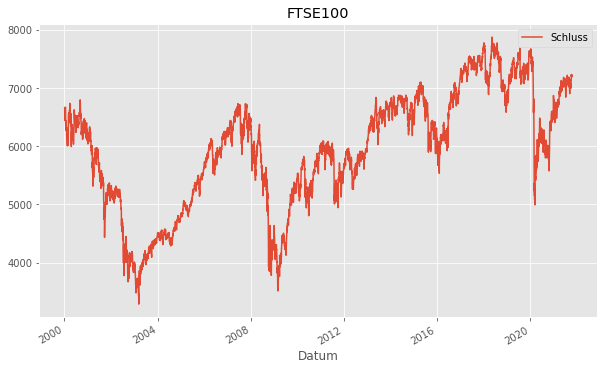

In [ ]:
# Plot der Preisentwicklung des FTSE100-Index
ftse100.plot(title = "FTSE100");

##### Extracting the Residual-components

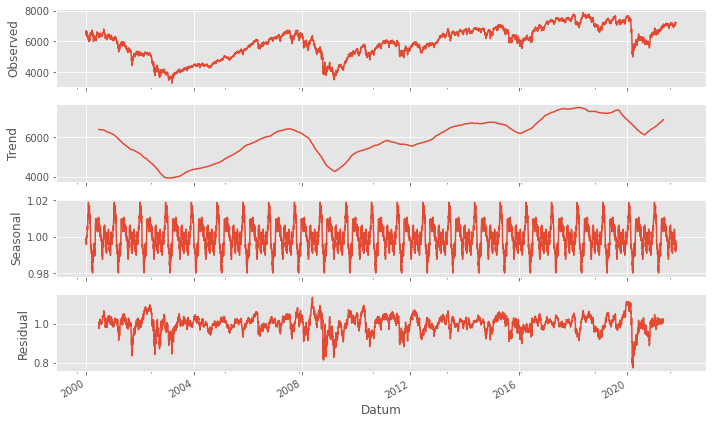

In [ ]:
# Decomposition der FTSE100-Zeitreihe
from statsmodels.tsa.seasonal import seasonal_decompose
ftse100_decomp = seasonal_decompose(ftse100, model = "multiplicative", freq = 240)
ftse100_decomp.plot();


In [ ]:
# Extrahieren von Residuals des FTSE100
ftse100_resid = ftse100_decomp.resid.dropna()
ftse100_resid.head()

,Schluss
Datum,
2000-06-28,0.984818
2000-06-29,0.974915
2000-06-30,0.984296
2000-07-03,1.008447
2000-07-04,1.003878


## 2) Exploring the Residuals

- Compare Residuals on a one-on-one basis
- Create Boxplots based on 20-day intervals of the residuals' mean
- Create Boxplots based on 20-day intervals of the residuals' variance

In [ ]:
# Übersicht der Residual-Dataframes
print(f"Residuals des DAX-Kursindex:\n{dax_resid.head(3)}\n\n")
print(f"Residuals des S&P500:\n{sp500_resid.head(3)}\n\n")
print(f"Residuals des STOXX Europe600:\n {stoxx600_resid.head(3)}\n\n")
print(f"Residuals des SMI:\n{smi_resid.head(3)}\n\n")
print(f"Residuals des FTSE100:\n{ftse100_resid.head(3)}")

Residuals des DAX-Kursindex:
             Schluss
Datum               
2000-09-18  1.008062
2000-09-19  1.009341
2000-09-20  0.984203


Residuals des S&P500:
             Schluss
Datum               
2000-06-26  1.020532
2000-06-27  1.019768
2000-06-28  1.023285


Residuals des STOXX Europe600:
              Schluss
Datum               
2000-06-22  1.001229
2000-06-23  0.998208
2000-06-26  1.000538


Residuals des SMI:
             Schluss
Datum               
2000-06-27  0.998208
2000-06-28  0.998796
2000-06-29  0.996629


Residuals des FTSE100:
             Schluss
Datum               
2000-06-28  0.984818
2000-06-29  0.974915
2000-06-30  0.984296


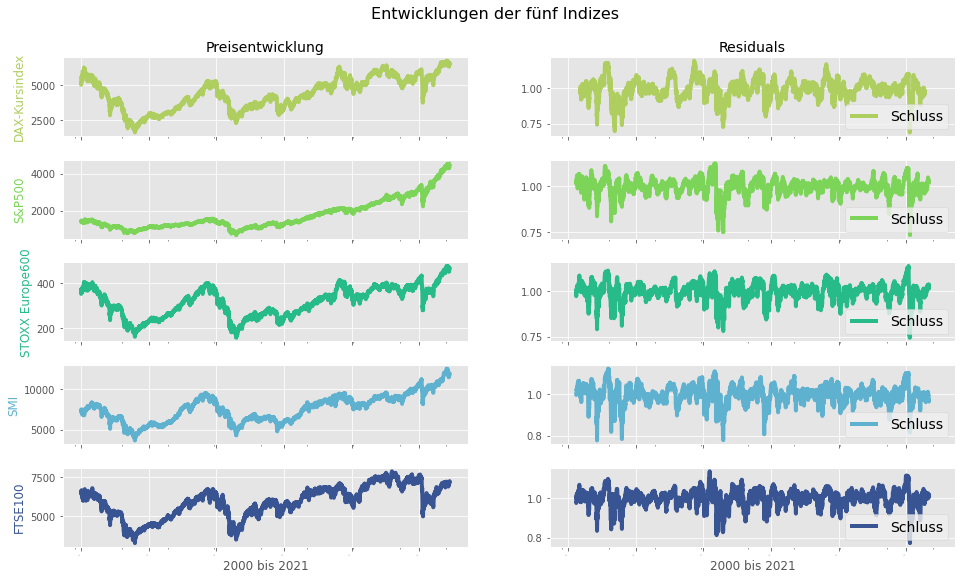

In [ ]:
# Plotting aller Residuals-Entwicklungen
fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize = (16, 10), sharey = False, sharex = True)
plt.style.use("fivethirtyeight")

# 1. Reihe: DAX-Kursindex
daxkurs["Schluss"].plot(ax = ax[0,0], color = "#AFCE60")
dax_resid.plot(ax = ax[0,1], color = "#AFCE60")
# 2. Reihe: S&P500
sp500["Schluss"].plot(ax = ax[1,0], color = "#7CD559")
sp500_resid.plot(ax = ax[1,1], color = "#7CD559")
# 3. Reihe: STOXX Europe600
stoxx600["Schluss"].plot(ax = ax[2,0], color = "#27BB8A")
stoxx600_resid.plot(ax = ax[2,1], color = "#27BB8A")
# 4. Reihe: SMI
smi["Schluss"].plot(ax = ax[3,0], color = "#5FB2CF")
smi_resid.plot(ax = ax[3,1], color = "#5FB2CF")
# 5. Reihe: FTSE100
ftse100["Schluss"].plot(ax = ax[4,0], color = "#385492")
ftse100_resid.plot(ax = ax[4,1], color = "#385492")

# Hinzufügen von Titeln & Achsenbeschriftungen
ax[0,0].set_ylabel("DAX-Kursindex", color = "#AFCE60")
ax[1,0].set_ylabel("S&P500", color = "#7CD559")
ax[2,0].set_ylabel("STOXX Europe600", color = "#27BB8A")
ax[3,0].set_ylabel("SMI", color = "#5FB2CF")
ax[4,0].set_ylabel("FTSE100", color = "#385492")

ax[4,0].set_xlabel("2000 bis 2021")
ax[4,1].set_xlabel("2000 bis 2021")

# Entfernen der xticklabels
ax[4,0].tick_params(axis = "x", labelsize = 0)
ax[4,1].tick_params(axis = "x", labelsize = 0)


# Label mit Spalten-Titel & Gesamttitel
ax[0,0].set_title("Preisentwicklung", fontsize = 14)
ax[0,1].set_title("Residuals", fontsize = 14)
fig.suptitle("Entwicklungen der fünf Indizes", fontsize = 16, y = 0.95)

plt.subplots_adjust(hspace = 0.3)

plt.show()

In [ ]:
# Merge indices
data = [dax_resid["Schluss"], sp500_resid["Schluss"], stoxx600_resid["Schluss"], ftse100_resid["Schluss"], smi_resid["Schluss"]]

keys = ["DAX-Kursindex", "S&P500", "STOXX Europe600", "FTSE100", "SMI"]

indices_resid = pd.concat(data, keys = keys, axis = 1, ignore_index=False)

indices_resid.head()